## Project Description

An online store’s marketing department compiled a list of hypothesis that may help boost revenue.

**Task : Prioritise Hypothesis, launch A/B test and analyse the results**

### Data Secription

hypotheses
1. Hypotheses — brief descriptions of the hypotheses
2. Reach — user reach, on a scale of one to ten
3. Impact — impact on users, on a scale of one to ten
4. Confidence — confidence in the hypothesis, on a scale of one to ten
5. Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

Data used in the second part of the project

orders_us
1. transactionId — order identifier
2. visitorId — identifier of the user who placed the order
3. date — of the order
4. revenue — from the order
5. group — the A/B test group that the user belongs to

visits_us
1. date — date
2. group — A/B test group
3. visits — the number of visits on the date specified in the A/B test group specified

In [1]:
#import libararies

import pandas as pd
pd.set_option('max_colwidth',400)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import datetime as dt


from pandas.plotting import register_matplotlib_converters


In [2]:
# import data 

hypothesis = pd.read_csv('hypotheses_us.csv', sep = ';')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [3]:
orders = pd.read_csv('orders_us.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [4]:
visitors = pd.read_csv('visits_us.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Data Preprocessing**

In [5]:
#check for distinct values in orders & visits

[orders['group'].value_counts() , visitors['group'].value_counts()]

[B    640
 A    557
 Name: group, dtype: int64,
 A    31
 B    31
 Name: group, dtype: int64]

In [6]:
#checking general information
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
#changing data types

orders['date'] = pd.to_datetime(orders['date'])
#orders['group'] = orders['group'].astype('category')


visitors['date'] = pd.to_datetime(visitors['date'])
#visitors['group'] = visitors['group'].astype('category')


In [10]:
#lower case all columns

hypothesis.columns = hypothesis.columns.str.lower()

In [11]:
orders.shape

(1197, 5)

In [12]:
duplicate_id = orders.groupby(['visitorId'])['group'].nunique().reset_index().query('group>1')['visitorId']

duplicate_id.shape

(58,)

In [13]:
orders = orders[~orders['visitorId'].isin(duplicate_id)]

orders.shape

(1016, 5)

In [14]:
# check for duplicates
[hypothesis.duplicated().sum() , orders.duplicated().sum(), visitors.duplicated().sum()]

[0, 0, 0]

##  Prioritizing Hypotheses

In [15]:
# ICE framework

hypothesis['ice'] = (hypothesis['impact'] + hypothesis['confidence']) / hypothesis['effort']


# RICE framework

hypothesis['rice'] = (hypothesis['reach'] + hypothesis['impact'] + hypothesis['confidence']) / hypothesis['effort']

In [16]:
#sort by ice

hypothesis.sort_values('ice', ascending=False).head(5)

,hypothesis,reach,impact,confidence,effort,ice,rice
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,3.666667,5.333333
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,3.600000,3.800000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,3.333333,6.000000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,3.000000,3.500000
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,3.000000,5.000000


In [17]:
#sort by rice

hypothesis.sort_values('rice', ascending=False).head(5)

,hypothesis,reach,impact,confidence,effort,ice,rice
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,3.333333,6.000000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,3.666667,5.333333
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,2.000000,5.000000
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,3.000000,5.000000
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,3.600000,3.800000


> **Conclusion:**
> <ul>
    <li>Hypothesis 6 seems to be given the first priority when it comes to ICE framework. The priority changes to Hypothesis 2 as per RICE framework. This is due to the importance given to different parameters by different framwork. </li>
    <li>ICE gives more priority to those where the confidence scale if higher and RICe gives more priorty to those where the reach is more</li>
   

## A/B test analysis

### Cumulative Revenue by group

In [18]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


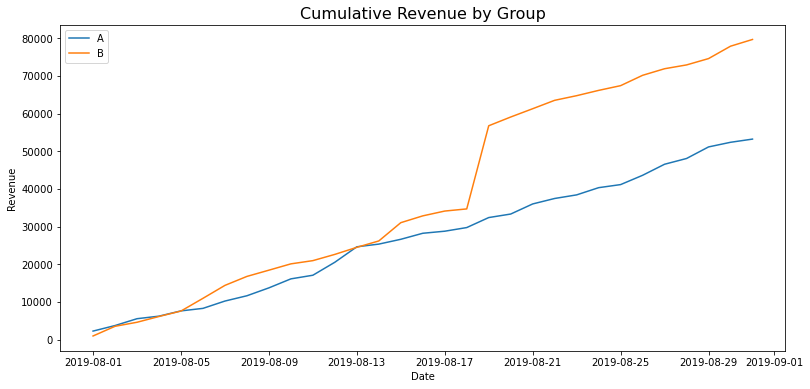

In [19]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(13,6))
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Cumulative Revenue by Group', fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

register_matplotlib_converters()

> **Conclusion:**
> <ul>
    <li>Initially the cumulative revenue is almost the same for both the groups with B slighlty leading. On Aug 18th group B sees a sudden spike in its revenue and remains consistently leading </li>
  

### average order size by group

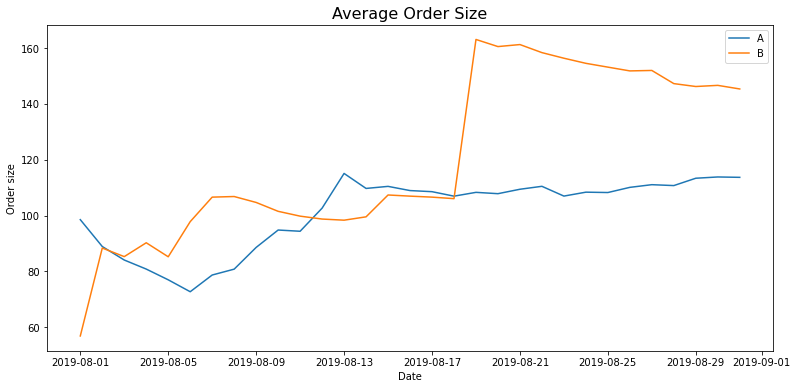

In [20]:

plt.figure(figsize=(13,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Average Order Size',fontsize = 16)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Order size')
plt.show()

> **Conclusion:**
> <ul>
    <li>Average purcshase size oscillates during the first half. Group B surges towards the second half and remains in the lead. The average puchase size stabilize at the end of the test</li>

### relative difference in cumulative average order size

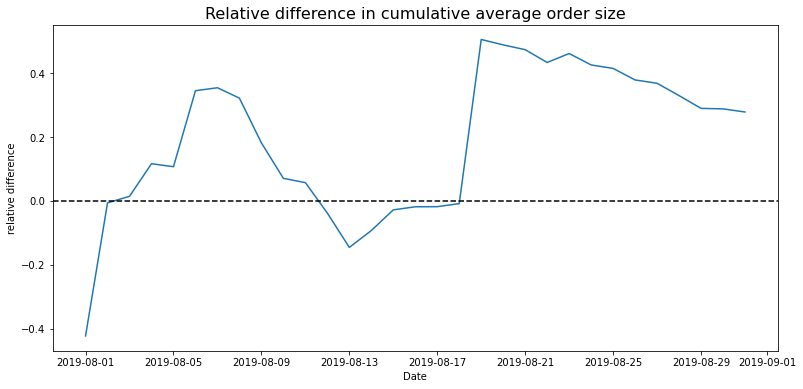

In [21]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(13,6))
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis

plt.title('Relative difference in cumulative average order size',fontsize = 16)
plt.xlabel('Date')
plt.ylabel('relative difference')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

> **Conclusion:**
> <ul>
    <li>At first, the group B is lower and then rises. It falls back again for a short time and then increases again. It remains leading during the second half and the graph stabilizes</li>
   

### Conversion Rate

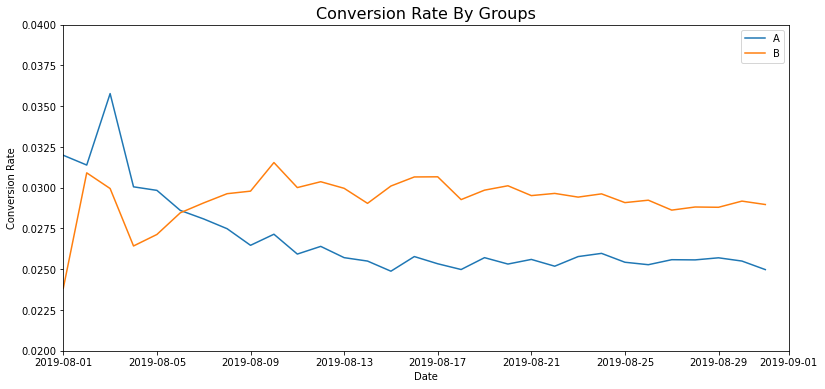

In [22]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(13,6))
# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Conversion Rate By Groups',fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')

# setting the axes' scale
plt.axis(["2019-08-01", '2019-09-01', 0.02, 0.04])
plt.show()

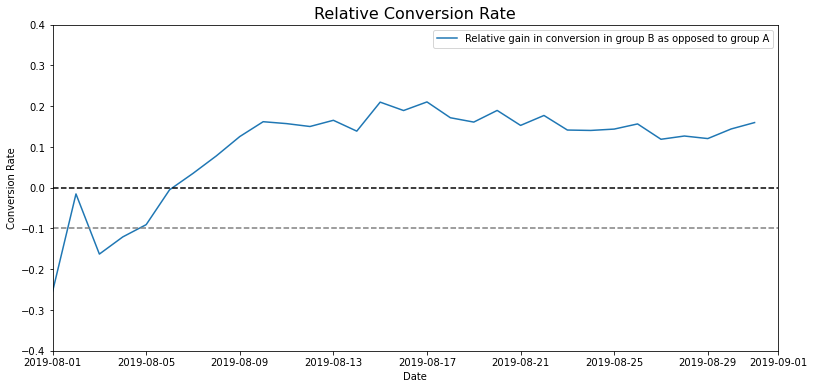

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(13,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()


plt.title('Relative Conversion Rate', fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.4, 0.4])
plt.show()

> **Conclusion:**
> <ul>
    <li>The conversion Rate for Group B is low initially and then it increases almost after a week and remains leading . The graph is stabilized at the end of the test</li>
    

### Number of orders per user

In [24]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(5))
 

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3


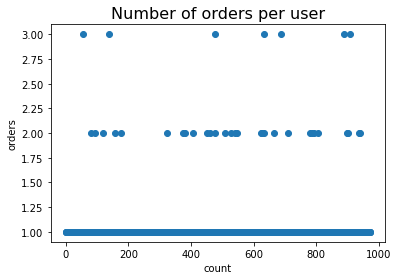

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Number of orders per user',fontsize = 16)
plt.xlabel('count')
plt.ylabel('orders')
plt.show()

> **Conclusion:**
> <ul>
    <li>From the scatter plot, it can be seen that dense region is for for number of orders equal 1, followed by 2 and the least one is 3</li>

### 95th and 99th percentiles for the number of orders per user.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95,99]))

[1. 2.]


> **Conclusion:**
> <ul>
    <li>Not more than 5% of users made more than 1 orders and not more than 1% of users placed an order more than 2</li>
    <li>Users who placed orders > 2 is considered to be anomalous </li>

### scatter chart of order prices

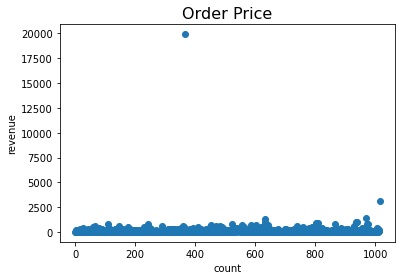

In [27]:
#plot without limiting axis

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title('Order Price', fontsize = 16)
plt.xlabel('count')
plt.ylabel('revenue')

plt.scatter(x_values, orders['revenue'])
plt.show()

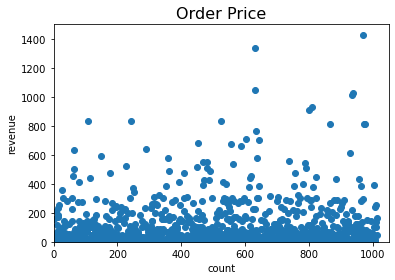

In [28]:
#plot limitting axis

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title('Order Price', fontsize = 16)
plt.xlabel('count')
plt.ylabel('revenue')
plt.axis([0,1050,0,1500])
plt.scatter(x_values, orders['revenue'])
plt.show()

> **Conclusion:**
> <ul>
    <li>From the scatter plot, we can conclude that most of the order placed were below 400$</li>
    <li>One extremly large order in the first plot is considered to be an outlier </li>

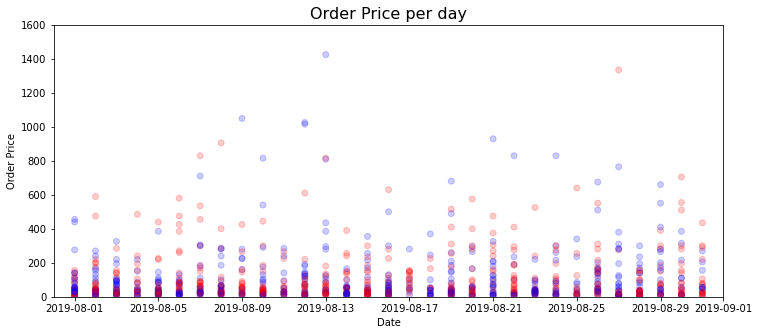

In [29]:
#plotting order price on a particular day
colors = {'A':'blue','B':'red'}

plt.figure(figsize=(12,5))
plt.scatter(x=orders['date'],y=orders['revenue'], color = orders['group'].map(colors),alpha =0.2)
plt.axis(['2019-07-31','2019-09-01',0,1600])
plt.title('Order Price per day', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Order Price')
plt.show()

> **Conclusion:**
> <ul>
    <li>Each day, most of the orders were below 500$</li>
    <li>There were some large orders towards the end of the october. This could be because of halloween</li>
    <li>Another reason could be purchasing an expenisve item</li>

### 95th and 99th percentiles of order prices

In [30]:
print(np.percentile(orders['revenue'], [95,99]))

[414.275 830.3  ]


> **Insights:**
> <ul>
    <li>Not more than 5% order's price were over 415\$ and not more than 1% orders were more than 830\$</li>
    <li>Any order above 830$ is considered to be anomalous</li>
  

### statistical significance of the difference in conversion 

**Ho : "There is not a statistically significant difference in conversion between the two groups"**<br>
**H1 : "There is statistically significant difference in conversion between the two groups"**
<br><br>

alpha value : 0.05 (since its the most common value)

In [31]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


> - *P-value is less than 0.05, So the null hypothesis can be rejected* <br>
> - *The relative gain of group B is 16%*

###  statistical significance of the difference in average order size

**Ho : "There is not a statistically significant difference in average order size between the two groups"**<br>
**H1 : "There is statistically significant difference in average order size between the two groups"**

<br><br>
alpha value : 0.05 (since its the most common value)

In [32]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


> - *P-value is higher than 0.05, so null hypothesis cannot be rejected*<br>
> - *The average order size for group B is larger than that of A*

### statistical significance of the difference in conversion between the groups using the filtered data

In [33]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 830]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
(19,)


In [34]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [35]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,True,'two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.006
0.192


> - *The results for conversion rate remains the same for filtered and unfiltered data*

### statistical significance of the difference in average order size between the groups using the filtered data

In [36]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], True, 'two-sided')[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.877
-0.014


> - *The p-value increased but the difference falls down to 1% instead of 2%*

### Decision based on the test results

> - Both raw and filtered data revealed statistically significant differences in conversion between the groups
> - Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups
> - The graph showing the difference in conversion between the groups tells us that group B's results better than A and stabilizes before the end of the test
> - The graph showing the difference in average order size between the groups tells us that group B's results are better than that of A
> - We can conclude the test to be successful and can be stopped. Group B seems to be better than A in most cases